## <center>  Scientific Programming with Python
##    <center>  Assignment: Life Expectancy
___
   
&nbsp;

**Author:** &emsp;&emsp; Erik Autenrieth &nbsp;(eauten2s, 9036029)

**Date:**   &emsp;&emsp;&emsp; 2021-18-07 

___
    
 

## Analyze a CSV file about the life expectancy at birth in all countries of the world.
___

##### Data source: &emsp;  life_expectancy_numpy_scipy.csv

| **Data  provided**  | **Description**                                                  | **Values**  |
| :--------------- |:----------------------------------------------------        |:------- |
| Country names:   | 217 countries, each country represents a row                 |name        |
| Country code :   | Unique code for every country.                              |code        | 
| Region       :   | Seven regions into wich the world is devided.               |[ASO,Pacific] [EUR,ASZ] [LAM,KAR] [ASN,AFN] [AMN]  [AFZ]               | 
| Income Group :   | Classification of the population in terms of income levels. |low, middle low, middle high, high        |
| Years        :   | 48 years between 1960 and 2018.                             |1960-1969, 1976-1979, 1980-1989, 1990-1994, 2000-2018 | 
| Life expectancy: | Every country has a life expectancy for every year.         |18.9 - 84.9 |




In [1]:
import sys
import warnings  

import matplotlib
matplotlib.rc('text', usetex=True)
matplotlib.rc('font', family = 'serif')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d

*A little javascript to avoid scrollbars when plotting.*

In [2]:
%%javascript    
IPython.OutputArea.prototype._should_scroll = function(lines) {return false;} 

<IPython.core.display.Javascript object>

## Task 1

##### 1) Read in the file and search for errors.

In [7]:
file = '.\data\life_expectancy_numpy_scipy.csv'

try:
    df_origin = pd.read_csv(file, sep=',', encoding='utf-8')
except OSError as e:
    print('The following error Nr.({0}) occurred while loading the csv: {1}'.format(e.errno,e.strerror))

#### 2) Generate a new DataFrame without NAN values.

In [4]:
shape_orignin = df_origin.shape
df = df_origin.dropna(how='any', inplace=True)  
df = df_origin.reset_index(drop=True) 

shape_drop_nan = df.shape
rows_lost = shape_orignin[0] - shape_drop_nan[0] 

#### 3) Output the number of missing rows.

In [5]:
print('{0} rows had missing data and were deleted, {1} rows (countries) remains.'.format(rows_lost,
                                                                                  shape_drop_nan[0]))

28 rows had missing data and were deleted, 189 rows (countries) remains.


#### 4) Output a small excerpt from the new DataFrame.

In [44]:
df.iloc[:,:15].head(6) 

,Country_Name,Country_Code,Region,Income_Group,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1976
0,Aruba,ABW,Latin America & Caribbean,high,65.662,66.074,66.444,66.787,67.113,67.435,67.762,68.095,68.436,68.784,71.140
1,Afghanistan,AFG,South Asia,low,32.446,32.962,33.471,33.971,34.463,34.948,35.430,35.914,36.403,36.900,40.715
2,Angola,AGO,Sub-Saharan Africa,middle low,37.524,37.811,38.113,38.430,38.760,39.102,39.454,39.813,40.178,40.546,43.053
3,Albania,ALB,Europe & Central Asia,middle high,62.283,63.301,64.190,64.914,65.463,65.850,66.110,66.304,66.487,66.689,69.110
4,United Arab Emirates,ARE,Middle East & North Africa,high,51.537,52.560,53.573,54.572,55.555,56.523,57.482,58.432,59.375,60.304,65.916
5,Argentina,ARG,Latin America & Caribbean,middle high,65.055,65.176,65.269,65.348,65.426,65.518,65.640,65.796,65.989,66.219,68.283


## Task 2    

### Plot a 6th degree polynomial of the orginal data from five random countries.


A polynomial has the general form:

$$\mathcal{P}_n(x) =  \sum_{i=0}^n a_ix^i,\quad  n \ge 0 $$

$$ \mathcal{P}_n(x) = a_0 + a_1x+ a_2x^2 + \dotsb + a_nx^n , \quad n \ge 0 $$

With $ n = 6 $ we get a polynomial in the following form:

$$ \mathcal{P}_6(x) = a_6x^6 + a_5x^5 + a_4x^4 + a_3x^3 + a_2x^2 +a_1x +a_0  $$

by using the commutativity of the coefficients.

##### 2) Create x-values [years] and y-values [life expectancy / country] to fit the polynomial.

In [45]:
countries = df["Country_Name"].values # list of country names

years = np.array(df.iloc[:,4:].columns, dtype=int).reshape(1,-1)  
years = years[0,:]

In [46]:
df_values = df.drop(['Country_Name', 'Country_Code', 'Region', 'Income_Group' ], axis=1)
df_values = df_values.values

matrix_values   = np.matrix(df_values)
rows_vals, cols = matrix_values.shape  

### User functions:
 `six_deg_poly()`&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;  Calculates a 6th polynom of an given dataset by using the `numpy.polyfit()` function.

`print_polynom()`&emsp;&emsp;&emsp;&emsp;  Prints the appropriate polynomial to explicitly show the coefficients.
 
`plot_data_polynom()`&emsp;&emsp; Plots the origin data, the associated and the inperpolated polynomial.

In [47]:
def six_deg_poly(x:[int]=None, y:[float]=None):
    """
    Calculates a 6th degree polynomial from the calculated coefficients of the given values.
    Input:
        x: x-values (years).
        y: y-values (life expectancy) 
    Returns: 
        the associated polynomial function in which the x values must be entered.
    """
    
    if((not isinstance(x,(list,np.ndarray))) or (not isinstance(y,(list,np.ndarray))) or (len(x)!=len(y))):
        sys.exit('Incorrect input format for the variables.')
    
    coeff  = np.polyfit(x, y, 6)
    p      = np.poly1d(coeff)
    warnings.simplefilter("ignore")  # used the warnings module to avoid annoying warnings when plottig.
    return p


def print_polynom(coeff:[float]=None):
    """
    Print a 6th-degree polynom based on the given coefficients.
    """
    
    poly_str = ''
    c = 6
    for i in range(0,7):
        poly_str += '(' + str('{0:.1e}'.format(coeff[i])) + ')' + 'x^{0}+'.format(c) 
        c-=1
    
    poly_str='P(x)= ' + poly_str[:len(poly_str)-4]  
    print('Polynom ' + '[' + countries[rand] + '] :')
    print(poly_str)


def plot_data_polynom(x:[int]=None, y:[float]=None, x_fit:[float]=None, p_fit:[float]=None, interp:[float]=None):
    """
    Plots the original data as a scatter plot and the polynomial of the fitted data.
    If data for the interpolation polynomial is transferred, this is also plotted. 
    """

    plt.figure(figsize=(12,4))
    plt.title('{0}'.format(countries[rand]), fontstyle='italic', fontweight='bold', fontsize=17)
    
    plt.scatter(x, y, alpha=.7, edgecolor='b', label='Orginal data')                    # original data
    plt.plot(x, p_fit, 'r--', linewidth=2, label='Fittet polynom P(x)')                 # 6th degree polynom
    
    if(isinstance(interp,(list,np.ndarray))): 
        plt.plot(x_fit, interp, 'g-', linewidth=2, label='Interpolation polynom $P(x)$')  # interpolation polynom
    
    plt.rc('axes', linewidth=3)
    plt.xticks(np.arange(min(x), max(x)+5, 5.0), fontsize=13)
    plt.yticks(fontsize=13)
    
    plt.minorticks_on()
    plt.tick_params(direction='out', length=6, width=2,grid_color='gray', grid_alpha=0.5)
    
    plt.xlabel('Years', fontsize=15, color='k')
    plt.ylabel('Life expectancy', fontsize=15, color='k')
    plt.grid(True)
    plt.legend(loc='best', shadow=True)
    plt.tight_layout(h_pad=3.0)
    plt.show()

In [48]:
five_rand_nr = np.random.choice(rows_vals,5,replace=False)  # create a array with five unique random values.
five_rand_nr = sorted(five_rand_nr)

print('The following five countries were selected: \n')
for country in five_rand_nr: print(df.iloc[country][0] + ' [Nr. ' + str(country) + ']')

The following five countries were selected: 

Cote d'Ivoire [Nr. 34]
Micronesia, Fed. Sts. [Nr. 59]
Macao SAR, China [Nr. 105]
Korea, Dem. People’s Rep. [Nr. 139]
Vietnam [Nr. 182]


##### 3) Plot the polynomials over the  randomly chosen original data sets.

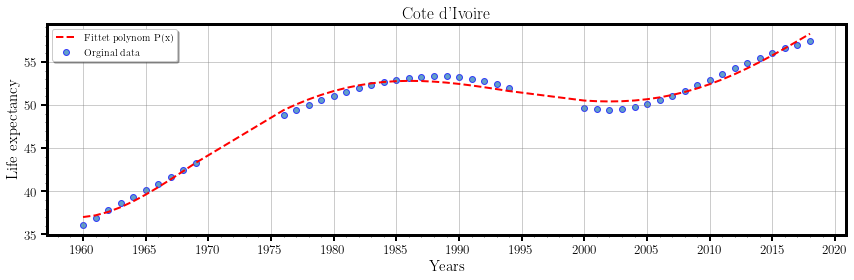

Polynom [Cote d'Ivoire] :
P(x)= (-1.6e-10)x^6+(1.3e-06)x^5+(-3.2e-03)x^4+(3.7e-04)x^3+(1.3e+04)x^2+(-2.0e+07)x^1+(1.0e+10)


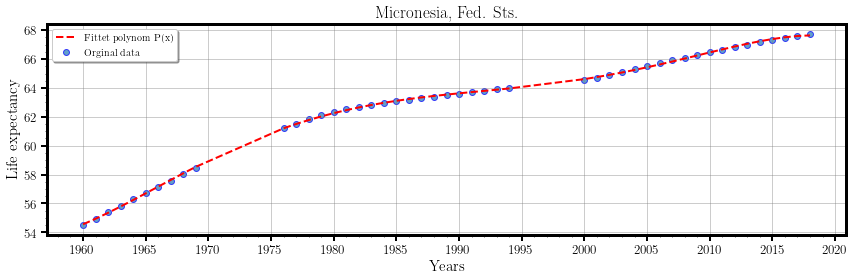

Polynom [Micronesia, Fed. Sts.] :
P(x)= (-5.4e-11)x^6+(4.3e-07)x^5+(-1.1e-03)x^4+(-5.3e-03)x^3+(4.2e+03)x^2+(-6.7e+06)x^1+(3.3e+09)


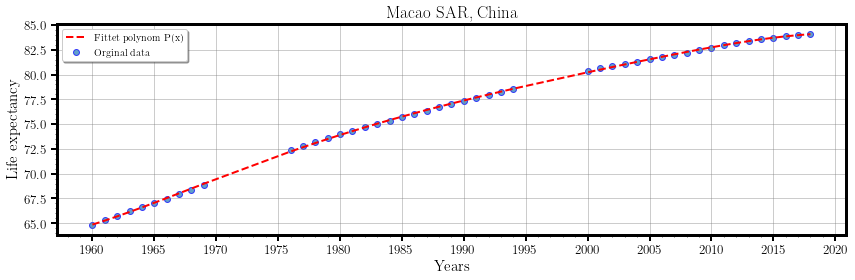

Polynom [Macao SAR, China] :
P(x)= (-2.3e-11)x^6+(1.8e-07)x^5+(-4.5e-04)x^4+(-1.7e-03)x^3+(1.8e+03)x^2+(-2.9e+06)x^1+(1.4e+09)


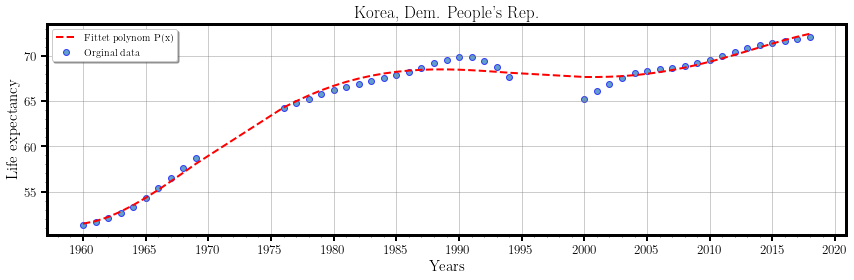

Polynom [Korea, Dem. People’s Rep.] :
P(x)= (-1.6e-10)x^6+(1.3e-06)x^5+(-3.1e-03)x^4+(-4.0e-03)x^3+(1.2e+04)x^2+(-2.0e+07)x^1+(9.8e+09)


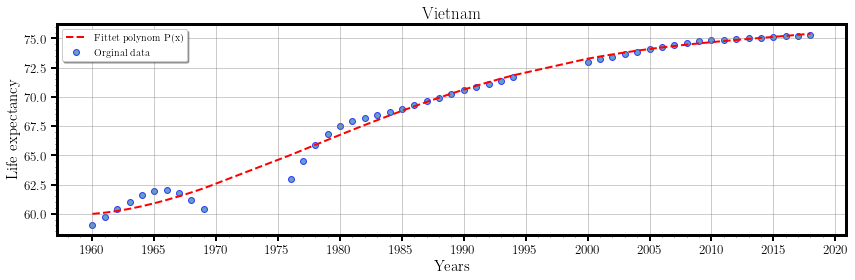

Polynom [Vietnam] :
P(x)= (-3.4e-12)x^6+(2.8e-08)x^5+(-7.3e-05)x^4+(3.9e-03)x^3+(2.9e+02)x^2+(-4.8e+05)x^1+(2.5e+08)


In [49]:
p_list=[]  # saves the polynomial values in order to compare them with the interpolation polynomial.

for rand in five_rand_nr:
    y = np.array(matrix_values[rand])
    poly_y = six_deg_poly(x=years,y=y[0,:])
    
    p_fit  = poly_y(years) 
    p_list.append(p_fit)
    
    plot_data_polynom(x=years,y=y,p_fit=p_fit)
    
    coeff  = poly_y.coefficients
    print_polynom(coeff=coeff)

## Task 3

### Plot an interpolation polynomial over all years between 1960 and 2018.
<br>

> Polynomial interpolation is the interpolation of a given data set by the polynomial of lowest possible degree that passes through the points of the dataset.  https://en.wikipedia.org/wiki/Polynomial_interpolation


by using the `scipy.interpolate.interp1d` function. 

In [50]:
x_fit = np.arange(min(years),max(years)+1)  # fill in missing years to optimize the polynom.

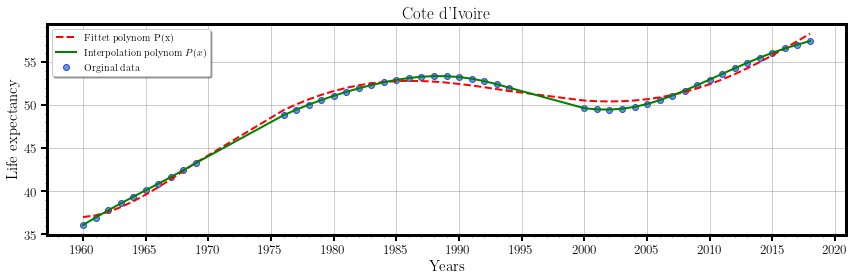

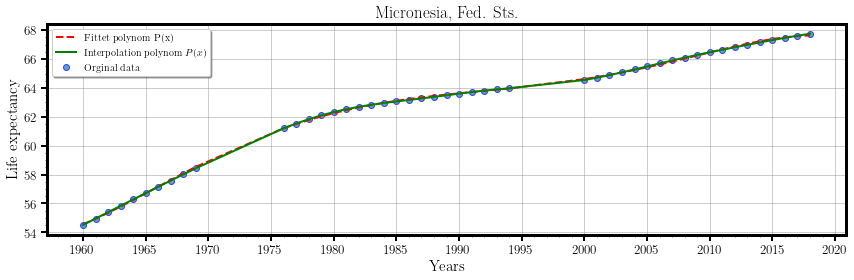

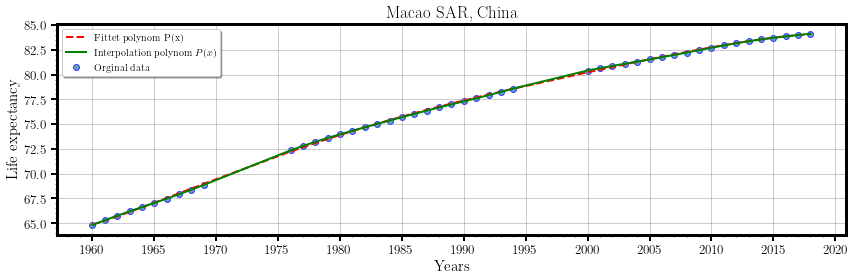

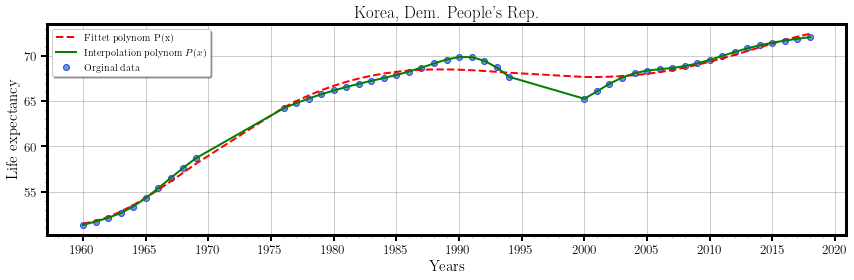

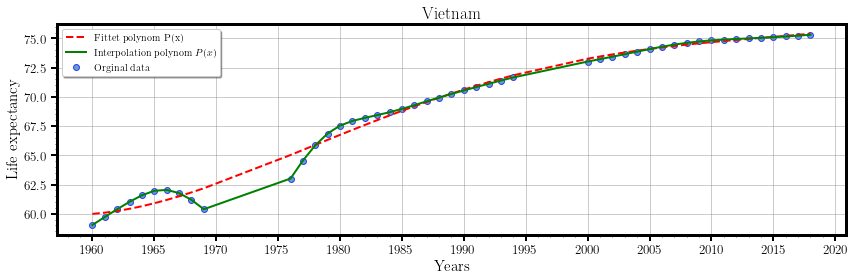

In [51]:
random_list = []  # saves the parameters of the five countries including the missing years for a new DataFrame
                 
for poly,rand in enumerate(five_rand_nr):
    y = np.array(matrix_values[rand])
    interp_fun = interp1d(years, y[0,:])
    interp_fit = interp_fun(x_fit)

    interp_values       = list(interp_fit.astype(float))   # all life expectancy values included for the missing years
    origin_country_data = list(df.iloc[rand,:4].values)    # name, country code, region, incomegroup 
    random_list.append(origin_country_data + interp_values)
    
    plot_data_polynom(x=years,y=y,x_fit=x_fit,p_fit=p_list[poly],interp=interp_fit)

### Create a new DataFrame with the interpolated life expactancy values, of the missing years, for the five data sets.

#### 1) Prepare the column names of the new DataFrame.

In [52]:
origin_cols   = list(df.columns[:4])             # name, country code, region, incomegroup 
missing_years = np.setdiff1d(x_fit,years)
missing_years = list(missing_years.astype(str))

missing_years_cols  = origin_cols + missing_years 
full_cols           = origin_cols  + list(x_fit.astype(str))

#### 2) Fill the original DataFrame with the missing values. Extract the missing data for the five countries from the new DataFrame.

In [53]:
df_five_inter_full    = pd.DataFrame(random_list,columns=full_cols)  # DataFrame with all values incl. the missing years
df_five_missing_years = df_five_inter_full[missing_years_cols]       # DataFrame with the values of the missing years

In [54]:
df_five_missing_years = df_five_missing_years.round(decimals=3)
df_five_missing_years

,Country_Name,Country_Code,Region,Income_Group,1970,1971,1972,1973,1974,1975,1995,1996,1997,1998,1999
0,Cote d'Ivoire,CIV,Sub-Saharan Africa,middle low,44.069,44.861,45.654,46.447,47.240,48.032,51.617,51.220,50.824,50.428,50.031
1,"Micronesia, Fed. Sts.",FSM,East Asia & Pacific,middle low,58.830,59.226,59.622,60.018,60.414,60.810,64.073,64.169,64.264,64.359,64.455
2,"Macao SAR, China",MAC,East Asia & Pacific,high,69.363,69.861,70.359,70.858,71.356,71.854,78.891,79.194,79.498,79.801,80.104
3,"Korea, Dem. People’s Rep.",PRK,East Asia & Pacific,low,59.470,60.260,61.049,61.838,62.627,63.417,67.293,66.888,66.483,66.078,65.673
4,Vietnam,VNM,East Asia & Pacific,middle low,60.758,61.134,61.509,61.884,62.259,62.635,71.892,72.119,72.346,72.572,72.798
